In [4]:
import pandas as pd
import numpy as np

array_1d = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

transition_matrix = {"Macrolayer 1": [[0., 0.28571429, 0.71428571],
                                        [0., 0., 1.],
                                        [1., 0., 0.]],
                     "Macrolayer 2": [[0., 0.57142857, 0.42857143],
                                        [0.47619048, 0., 0.52380952],
                                        [0.29411765, 0.70588235, 0.]],
                     "Macrolayer 3": [[0., 0.25, 0.3125, 0.4375],
                                        [0.33333333, 0., 0.66666667, 0.],
                                        [0.41666667, 0.16666667, 0., 0.41666667],
                                        [0.58333333, 0.25, 0.16666667, 0.]],
                     "Macrolayer 4": [[0., 0.57142857,  0.28571429,  0.14285714],
                                        [0.36363636, 0., 0.63636364, 0.],
                                        [0.4, 0.6, 0., 0.],
                                        [0., 1., 0., 0.]],
                    }

lambda_MacroLayers = {"Macrolayer 1": [0.19546225, 3.4657359, 0.25398282],
            "Macrolayer 2": [33500492, 0.7616348, 0.57967196],
            "Macrolayer 3": [0.82642141, 1.32593452, 0.42293198, 1.34284288],
            "Macrolayer 4": [0.77390524, 1.11190655, 0.23288008, 18.42068074]
            }

def lambda_dataframe(array_1d):
    # Convert the 1D array to a data frame
    df = pd.DataFrame(array_1d.reshape(1, -1))

    # Rename the columns if desired
    df.columns = ['Litho {}'.format(i) for i in range(1, df.shape[1] + 1)]
    # Rename the index
    df.rename(index={0: 'lambda'}, inplace=True)
    # Output the resulting data frame
    return df

In [12]:
np.array(transition_matrix["Macrolayer 4"])

array([[0.        , 0.57142857, 0.28571429, 0.14285714],
       [0.36363636, 0.        , 0.63636364, 0.        ],
       [0.4       , 0.6       , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        ]])

In [25]:
for x in lambda_MacroLayers.keys():
    print(lambda_MacroLayers[x])

[0.19546225, 3.4657359, 0.25398282]
[33500492, 0.7616348, 0.57967196]
[0.82642141, 1.32593452, 0.42293198, 1.34284288]
[0.77390524, 1.11190655, 0.23288008, 18.42068074]


<Axes: >

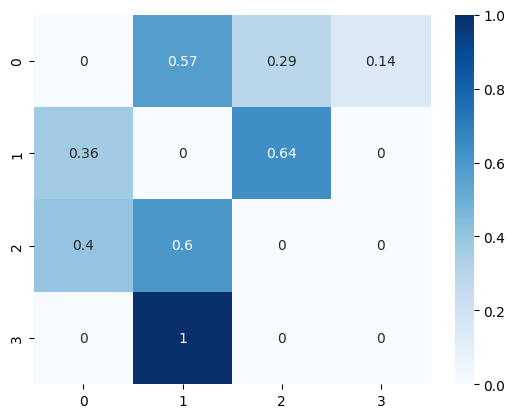

In [26]:
import seaborn as sb
sb.heatmap(transition_matrix["Macrolayer 4"], cmap="Blues", annot=True)


In [30]:
7%2

1

In [31]:
import json
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def view_curves(data:pd.DataFrame=None, curves:list=[], log:list=[],
        depth_col:str='DEPT', new_color:dict={}, new_unit:dict={},
        ):
    #FUNCTIONS DESIGNING-------------------------------------------------------------------------------------------------
    #Function of Plotting single curve
    def add_trace(curv:str=None, color:str='#38a2e8', xaxis:str='x1', unit:str=None, id_subplt:int=1, log:list=None):
        fig.add_trace(go.Scattergl(y=data[depth_col], x=data[curv], name=curv, mode="lines", line=dict(color=color, width=1.), xaxis=xaxis),1 ,id_subplt)\
            .update_xaxes(title_text=f'{curv} ({unit})', row=1, col=id_subplt, color=color,
                        tickcolor=color, minor=dict(tickcolor=color), tickfont=dict(color=color))
        if curv in log:
            fig.update_xaxes(type='log', row=1, col=id_subplt)

    #Function to update X-Axis parameters
    def update_xaxes(type:str=None):
                fig.update_xaxes(
                                title_font=dict(size=12, family='Arial'),
                                title_standoff = 0, side='top', nticks=5, fixedrange=True,
                                ticks="inside", tickwidth=1, ticklen=8, ticklabelstep=1,
                                tickfont=dict(family="Arial", size=12),
                                minor_ticks="inside", minor=dict(ticklen=4, showgrid=True),
                                showline=True, linewidth=1, linecolor='black', mirror=True,
                                showgrid=True, gridwidth=1, gridcolor='#d9d9d9',
                                showspikes=True, spikecolor="#8d9199", spikesnap="hovered data", spikemode="across", spikethickness=1, spikedash='solid',
                                )
                if type is not None:
                        fig.update_xaxes(type=type)
                        
    #Function to update Y-Axis parameters
    def update_yaxes(type:str=None):
            fig.update_yaxes(
                            # title_font=dict(size=18, family='Arial', color='#393533'),
                            # matches='y'
                            title_standoff = 0,
                            autorange="reversed",
                            nticks=10,
                            ticks="outside", tickwidth=1, tickcolor='black', ticklen=8, ticklabelstep=1, 
                            tickfont=dict(family="Arial", color='black', size=12),
                            minor_ticks="outside", minor=dict(ticklen=4, tickcolor="black", showgrid=False),
                            showline=True, linewidth=1, linecolor='black', mirror=True,
                            showgrid=True, gridwidth=1, gridcolor='#d9d9d9',
                            rangemode='nonnegative', #(normal or tozero or nonnegative)
                            showspikes=True, spikecolor="#8d9199", spikesnap="cursor", spikemode="across", spikethickness=1, spikedash='solid',
                            )
            if type is not None:
                    fig.update_yaxes(type=type)

    #Function to update FIGURE LAYOUT parameters
    def update_layout(_size:list=[400,800]):
            fig.update_layout(
                            width=_size[0], height=_size[1],
                            showlegend=False,
                            plot_bgcolor="white",
                            margin=dict(t=10,l=10,b=10,r=10),
                            hovermode="y", #"y unified", "y", "x", "closest"
                            )

    #VARIABLES DEFINITION------------------------------------------------------------------------------------------------
    #Sort dataframe by DEPTH
    data = data.sort_values(by=depth_col)

    #Default color codes
    meta_info = '{"Unit":{"HCAL":"in","CALI":"in","CALS":"in","C1":"in","C2":"in","RHOB":"g\\/c3","RHO8":"g\\/c3","RHO8_filte":"g\\/c3","RHOZ":"g\\/c3","ZDEN":"g\\/c3","ZDNC":"g\\/c3","HDRA":"g\\/c3","DRHO":"g\\/c3","DSOZ":"g\\/c3","ECD_ARC":"g\\/c3","NPHI":"v\\/v","TNPH":"v\\/v","TNPH_CH":"v\\/v","HNPO":"v\\/v","HNPO_filte":"v\\/v","CNCF":"% (pu)","NPOR":"v\\/v","CH_NPHI":"v\\/v","CH_NPHIds":"v\\/v","CFTC":"Hz","CNTC":"Hz","DTC":"us\\/f","DTCO":"us\\/f","DT":"us\\/f","DT4P":"us\\/f","DT5":"us\\/f","DT_SPL":"us\\/f","DTS":"us\\/f","DTSM":"us\\/f","DT2":"us\\/f","DTSO":"us\\/f","DT4S":"us\\/f","GR":"GAPI","GR1":"GAPI","GR_ARC":"GAPI","CGR":"GAPI","EHGR":"GAPI","ECGR":"GAPI","SGR":"GAPI","GR_SPULSE_BHC":"GAPI","GR_IMP":"GAPI","GRM1":"GAPI","MWD_GR_BHC":"GAPI","GRAM":"GAPI","GR_SPL":"GAPI","GR_CDR":"GAPI","ARC_GR_RT":"GAPI","GR_LWD":"GAPI","POTA":"%","THOR":"ppm","URAN":"ppm","TPRA":"v\\/v","TURA":"v\\/v","UPRA":"v\\/v","LLD":"Ohmm","LLS":"Ohmm","DIL":"Ohmm","ILD":"Ohmm","ILM":"Ohmm","RILD":"Ohmm","RILM":"Ohmm","HRI":"Ohmm","RIDPH":"Ohmm","RIMPH":"Ohmm","RSFL":"Ohmm","HDRS":"Ohmm","HMRS":"Ohmm","LL3":"Ohmm","RIPD":"Ohmm","RIPM":"Ohmm","AT10":"Ohmm","AT20":"Ohmm","AT30":"Ohmm","AT60":"Ohmm","AT90":"Ohmm","AO10":"Ohmm","AO20":"Ohmm","AO30":"Ohmm","AO60":"Ohmm","AO90":"Ohmm","AF10":"Ohmm","AF20":"Ohmm","AF30":"Ohmm","AF60":"Ohmm","AF90":"Ohmm","AHO10":"Ohmm","AHO20":"Ohmm","AHO30":"Ohmm","AHO60":"Ohmm","AHO90":"Ohmm","M2RX":"Ohmm","M2R9":"Ohmm","M2R6":"Ohmm","M2R3":"Ohmm","M2R1":"Ohmm","P16H_UNC":"Ohmm","P22H_UNC":"Ohmm","P28H_UNC":"Ohmm","P34H_UNC":"Ohmm","P40H_UNC":"Ohmm","A28H_UNC":"Ohmm","A34H_UNC":"Ohmm","A40H_UNC":"Ohmm","P16L_UNC":"Ohmm","P22L_UNC":"Ohmm","P28L_UNC":"Ohmm","P34L_UNC":"Ohmm","P40L_UNC":"Ohmm","P22H_UNC_RT":"Ohmm","P40H_UNC_RT":"Ohmm","P40H_UNC_R":"Ohmm","P22H_UNC_R":"Ohmm","HLLD":"Ohmm","HLLS":"Ohmm","RES_DEEP":"Ohmm","RES_SHAL":"Ohmm","Rdeep":"Ohmm","Rshallow":"Ohmm","P33H_UNC":"Ohmm","P33L_UNC":"Ohmm","A33H_UNC":"Ohmm","A33L_UNC":"Ohmm","RACHM":"Ohmm","RACLM":"Ohmm","RPCHM":"Ohmm","RPCLM":"Ohmm","RPCSHM":"Ohmm","RPCSLM":"Ohmm","RACSHM":"Ohmm","RACSLM":"Ohmm","RAC1HM":"Ohmm","RAC1LM":"Ohmm","RPC1HM":"Ohmm","RPC1LM":"Ohmm","RAC2HM":"Ohmm","RAC2LM":"Ohmm","RPC2HM":"Ohmm","RPC2LM":"Ohmm","RAC3HM":"Ohmm","RAC3LM":"Ohmm","RPC3HM":"Ohmm","RPC3LM":"Ohmm","RAC4HM":"Ohmm","RAC4LM":"Ohmm","RPC4HM":"Ohmm","RPC4LM":"Ohmm","MSFL":"Ohmm","RXO8":"Ohmm","ATR":"Ohmm","PSR":"Ohmm","RT":"Ohmm","TAB_CDR_RES":"hr","TAB_ARC_RES":"s","TAB_RES":"s","PEF":"_","PEF8":"_","PERF":"_","PEFZ":"_","ROP5_RM":"m\\/hr","ROP":"m\\/hr","ROP5":"m\\/hr","ROPS":"m\\/hr","RXOZ":"Ohmm","RSOZ":"Ohmm","ITT":"s","TENS":"lbf","TTEN":"lbf","HTEN":"lbf","CDF":"lbf","ATMP":"degC","TEMP_MCR":"_","TVDE":"m","SP":"mV","VPVS":"v\\/v","LSN":"cps","SSN":"cps","APRS_ARC":"psi","ARTM":"_","AGTK":"_","ARTK":"_","Temp":"degC","TEMP_LWD":"degC","WTBH":"degC","WTBH1":"degC","TEMP_DNI_RT":"degC","HSTEMP":"degC","TCDM":"degC","RPTHM":"mins","CHT":"lbf","DPHI":"v\\/v","SPHI":"v\\/v","PHIE":"v\\/v","PR":"_","ICV":"m3","IHV":"m3","GTEM":"degC","DHTEMP":"degC","TTEM_CDR":"degC","SVEL":"m\\/s","TTSL":"us","TT":"us","CBSL":"mV","CBL":"mV","WF2":"_","WF1":"_","CBLF":"mV","CCL":"_","BS":"_","TGAS":"ppm","Oilshow":"_"},"Color":{"HCAL":"#bf2273","CALI":"#bf2273","CALS":"#bf2273","C1":"#bf2273","C2":"#bf2273","RHOB":"#f20a0a","RHO8":"#f20a0a","RHO8_filte":"#f20a0a","RHOZ":"#f20a0a","ZDEN":"#f20a0a","ZDNC":"#f20a0a","HDRA":"#f20a0a","DRHO":"#f20a0a","DSOZ":"#f20a0a","ECD_ARC":"#f20a0a","NPHI":"#0a44f2","TNPH":"#0a44f2","TNPH_CH":"#0a44f2","HNPO":"#0a44f2","HNPO_filte":"#0a44f2","CNCF":"#0a44f2","NPOR":"#0a44f2","CH_NPHI":"#0a44f2","CH_NPHIds":"#0a44f2","CFTC":"#0a44f2","CNTC":"#0a44f2","DTC":"#ea0af2","DTCO":"#ea0af3","DT":"#ea0af4","DT4P":"#ea0af5","DT5":"#ea0af6","DT_SPL":"#ea0af7","DTS":"#630af2","DTSM":"#630af3","DT2":"#630af4","DTSO":"#630af6","DT4S":"#630af7","GR":"#40f20a","GR1":"#40f20a","GR_ARC":"#40f20a","CGR":"#40f20a","EHGR":"#40f20a","ECGR":"#40f20a","SGR":"#40f20a","GR_SPULSE_BHC":"#40f20a","GR_IMP":"#40f20a","GRM1":"#40f20a","MWD_GR_BHC":"#40f20a","GRAM":"#40f20a","GR_SPL":"#40f20a","GR_CDR":"#40f20a","ARC_GR_RT":"#40f20a","GR_LWD":"#40f20a","POTA":"#0a0a0a","THOR":"#0a0a0a","URAN":"#0a0a0a","TPRA":"#0a0a0a","TURA":"#0a0a0a","UPRA":"#0a0a0a","LLD":"#f20a0a","LLS":"#0a44f2","DIL":"#0a44f2","ILD":"#f20a0a","ILM":"#0a44f2","RILD":"#f20a0a","RILM":"#0a44f2","HRI":"#f20a0a","RIDPH":"#0a44f2","RIMPH":"#eb0edc","RSFL":"#f20a0a","HDRS":"#0a44f2","HMRS":"#eb0edc","LL3":"#f20a0a","RIPD":"#0a44f2","RIPM":"#eb0edc","AT10":"#f20a0a","AT20":"#f20a0a","AT30":"#f20a0a","AT60":"#0a44f2","AT90":"#0a44f2","AO10":"#f20a0a","AO20":"#f20a0a","AO30":"#f20a0a","AO60":"#0a44f2","AO90":"#0a44f2","AF10":"#f20a0a","AF20":"#f20a0a","AF30":"#f20a0a","AF60":"#0a44f2","AF90":"#0a44f2","AHO10":"#f20a0a","AHO20":"#f20a0a","AHO30":"#f20a0a","AHO60":"#0a44f2","AHO90":"#0a44f2","M2RX":"#0a44f2","M2R9":"#0a44f2","M2R6":"#0a44f2","M2R3":"#f20a0a","M2R1":"#f20a0a","P16H_UNC":"#f20a0a","P22H_UNC":"#f20a0a","P28H_UNC":"#f20a0a","P34H_UNC":"#0a44f2","P40H_UNC":"#0a44f2","A28H_UNC":"#f20a0a","A34H_UNC":"#0a44f2","A40H_UNC":"#0a44f2","P16L_UNC":"#f20a0a","P22L_UNC":"#f20a0a","P28L_UNC":"#f20a0a","P34L_UNC":"#0a44f2","P40L_UNC":"#0a44f2","P22H_UNC_RT":"#f20a0a","P40H_UNC_RT":"#0a44f2","P40H_UNC_R":"#0a44f2","P22H_UNC_R":"#f20a0a","HLLD":"#f20a0a","HLLS":"#0a44f2","RES_DEEP":"#f20a0a","RES_SHAL":"#0a44f2","Rdeep":"#f20a0a","Rshallow":"#0a44f2","P33H_UNC":"#0a44f2","P33L_UNC":"#f20a0a","A33H_UNC":"#0a44f2","A33L_UNC":"#f20a0a","RACHM":"#0a44f2","RACLM":"#f20a0a","RPCHM":"#0a44f2","RPCLM":"#f20a0a","RPCSHM":"#0a44f2","RPCSLM":"#f20a0a","RACSHM":"#0a44f2","RACSLM":"#f20a0a","RAC1HM":"#0a44f2","RAC1LM":"#f20a0a","RPC1HM":"#0a44f2","RPC1LM":"#f20a0a","RAC2HM":"#0a44f2","RAC2LM":"#f20a0a","RPC2HM":"#0a44f2","RPC2LM":"#f20a0a","RAC3HM":"#0a44f2","RAC3LM":"#f20a0a","RPC3HM":"#0a44f2","RPC3LM":"#f20a0a","RAC4HM":"#0a44f2","RAC4LM":"#f20a0a","RPC4HM":"#0a44f2","RPC4LM":"#f20a0a","MSFL":"#0a44f2","RXO8":"#f20a0a","ATR":"#0a44f2","PSR":"#f20a0a","RT":"#f20a0a","TAB_CDR_RES":"#f20a0a","TAB_ARC_RES":"#f20a0a","TAB_RES":"#f20a0a","PEF":"#f70ad0","PEF8":"#f70ad1","PERF":"#f70ad2","PEFZ":"#f70ad3","ROP5_RM":"#f20a0a","ROP":"#f20a0a","ROP5":"#f20a0a","ROPS":"#f20a0a","RXOZ":"#0e33eb","RSOZ":"#0e33eb","ITT":"#2291f2","TENS":"#11f2f2","TTEN":"#11f2f3","HTEN":"#11f2f4","CDF":"#11f2f5","ATMP":"#fa0202","TEMP_MCR":"#fa0203","TVDE":"#0f1d29","SP":"#fa4402","VPVS":"#e102fa","LSN":"#ed0510","SSN":"#0533ed","APRS_ARC":"#ed0510","ARTM":"#f20a0a","AGTK":"#40f20a","ARTK":"#f20a0a","Temp":"#fa0202","TEMP_LWD":"#fa0203","WTBH":"#fa0204","WTBH1":"#fa0205","TEMP_DNI_RT":"#fa0206","HSTEMP":"#fa0207","TCDM":"#fa0208","RPTHM":"#454141","CHT":"#34fa02","DPHI":"#fa4402","SPHI":"#fa02e9","PHIE":"#fa0249","PR":"#fa02f6","ICV":"#9c959b","IHV":"#9c959b","GTEM":"#fa0202","DHTEMP":"#fa0203","TTEM_CDR":"#fa0205","SVEL":"#dd02fa","TTSL":"#dd02fa","TT":"#dd02fa","CBSL":"#fa0202","CBL":"#fa0203","WF2":"#630af2","WF1":"#630af2","CBLF":"#9c959b","CCL":"#9c959b","BS":"#9c959b","TGAS":"#fa0202","Oilshow":"#078238"}}'
    curve_info = json.loads(meta_info)
    curve_info['Unit'].update(new_unit) if len(new_unit) != 0 else curve_info['Unit']
    curve_info['Color'].update(new_color) if len(new_color) != 0 else curve_info['Color']
    log_type = ['LLD', 'LLS', 'DIL', 'ILD', 'ILM', 'RILD', 'RILM', 'HRI', 'RIDPH', 'RIMPH', 'RSFL', 'HDRS', 'HMRS', 'LL3', 'RIPD', 'RIPM', 'AT10', 'AT20', 'AT30', 'AT60', 'AT90', 'AO10', 'AO20', 'AO30', 'AO60', 'AO90', 'AF10', 'AF20', 'AF30', 'AF60', 'AF90', 'AHO10', 'AHO20', 'AHO30', 'AHO60', 'AHO90', 'M2RX', 'M2R9', 'M2R6', 'M2R3', 'M2R1', 'P16H_UNC', 'P22H_UNC', 'P28H_UNC', 'P34H_UNC', 'P40H_UNC', 'A28H_UNC', 'A34H_UNC', 'A40H_UNC', 'P16L_UNC', 'P22L_UNC', 'P28L_UNC', 'P34L_UNC', 'P40L_UNC', 'P22H_UNC_RT', 'P40H_UNC_RT', 'P40H_UNC_R', 'P22H_UNC_R', 'HLLD', 'HLLS', 'RES_DEEP', 'RES_SHAL', 'Rdeep', 'Rshallow', 'P33H_UNC', 'P33L_UNC', 'A33H_UNC', 'A33L_UNC', 'RACHM', 'RACLM', 'RPCHM', 'RPCLM', 'RPCSHM', 'RPCSLM', 'RACSHM', 'RACSLM', 'RAC1HM', 'RAC1LM', 'RPC1HM', 'RPC1LM', 'RAC2HM', 'RAC2LM', 'RPC2HM', 'RPC2LM', 'RAC3HM', 'RAC3LM', 'RPC3HM', 'RPC3LM', 'RAC4HM', 'RAC4LM', 'RPC4HM', 'RPC4LM', 'MSFL', 'RXO8', 'ATR', 'PSR', 'RT', 'RXOZ', 'RSOZ']
    log_type_update = list(set(log_type + log))

    #Define curves in columns list
    if len(curves) != 0:
        curves_list = curves
    else:
        curves_list = data.select_dtypes(include=['float64']).columns.drop(depth_col)
    
    #Calculate numbers of plotting columns and size of whole figure
    cols = len(curves_list); height= 500; 
    width = cols * 150 if cols*150 < 1300 else 1300 
    #Make subplots layout
    fig = go.Figure()
    fig = make_subplots(rows=1, cols=cols, shared_yaxes=True, horizontal_spacing=0.01)

    #Check selected curves for plotting
    for i, curve in enumerate(curves_list):
        #Assign color code for single curve
        color = curve_info['Color'][curve] if curve in curve_info['Color'].keys() else '#38a2e8'
        unit = curve_info['Unit'][curve] if curve in curve_info['Unit'].keys() else '_'
        #Add trace to subplots
        add_trace(curv=curve, color=color, xaxis=f'x{i+1}', unit=unit, id_subplt=i+1, log=log_type_update)
        
    #Setup the Axes and Layout parameters
    update_xaxes(); update_yaxes(); update_layout([width, height])
    #Show the main figure
    fig.show(config=dict(displayModeBar=True))
    
    # Plot Streamlit!
    import streamlit as st
    # st.plotly_chart(fig, use_container_width=True)
    # container.plotly_chart(fig, use_container_width=True)
    #Export to html
    # return plotly.offline.plot(fig, output_type='div', include_plotlyjs='cdn')
    
    # fig.write_image("assets/images/logview.png")
    

In [35]:
import pandas as pd
df = pd.read_csv("well_log_data.csv")
view_curves(df, depth_col="DEPTH")